## Тестовое задание Младший аналитик
### Выполнила Барбие Анастасия

### Вопросы
1) Знание Python оцениваю на 7 баллов. Могу выполнять различные задачи на python, но переодически приходится обращаться к документации.
2) Знание Google Sheets на 7 баллов. В рамках учебного процесса использовала различные формулы и фильтры, строила графики. Для более продвинутого взаимодействия потребуется обращение к документации.

### Задачи на логику:
1) В начале дня бюджет составлял 40 долларов. После полудня осталась половина бюджета, то есть 20 долларов. А после того как потратили еще 80% от остатка не потраченными остались 20*0,2=4$
   
   Ответ: 4$

2) 120$/5к/24дн=1$ на каждую кампанию на 1 6-часовой день -> 1/6$ в час
   
   При 8-часовом рабочем дне 9 кампаний, получаем (1/6$)*8ч*9к=12$ в день уходит на все кампании

   При бюджете в 216 долларов  9 кампаний по 8 часов работали бы 216$/12$=18 дней.

   Ответ: 18 дней.
3) 200-80=120 баннеров было использовано

   120-60=60 баннеров использовались либо в обеих кампаниях, либо только во второй

   Допустим, количество баннеров, использованных в обеих кампаниях = x, тогда во второй использовано 3x.

   x+3x=60

   x=15

   Ответ: 15 баннеров использовано в обеих кампаниях.
4) Энн использовала Inst и YouTube, Джон - YouTube и Facebook, Кейт - YouTube и Facebook, Том - Facebook и Inst

   Ответ: у Джона и Кейт предпочтения совпадают.
5) 78*4=312 общий балл за 4 модуля

   Для среднего балла за 5 модулей необходимо в сумме набрать 80*5=400 баллов

   400-312=88

   Ответ: 88 балла должен получить стажер за 5-й модуль.
6) (260км/80кмч)*60мин=195мин

   (260км/100кмч)*60мин=156мин

   195-156=39 мин

   Ответ: на 39 минут.

### 1) Вычисление общей выручки за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [54]:
import numpy as np
import pandas as pd

In [55]:
data=pd.read_excel('data.xlsx',  
                   usecols='A:H')

In [56]:
#функция получения данных за определенный месяц
def get_data_segment(month1: str, month2: str, accounting_of_overdue: bool=False):
    index_month1 = data.index[data['status'] == month1].tolist()
    
    if month2!='Ноябрь 2021':
        index_month2 = data.index[data['status'] == month2].tolist()
    else:
        index_month2 = [len(data)]

    data_segment = data[index_month1[0]+1:index_month2[0]]
    
    if accounting_of_overdue:
        data_segment = data_segment[data_segment['status'] != 'ПРОСРОЧЕНО']
    
    return data_segment

#функция вычисления дохода за определенный месяц
def calculate_monthly_sum(month1: str, month2: str, accounting_of_overdue: bool=False):
    data_segment = get_data_segment(month1, month2, accounting_of_overdue)
    total_sum = round(data_segment['sum'].sum(), 2)
    
    return total_sum


In [57]:
print('Выручка за июль 2021:', calculate_monthly_sum('Июль 2021', 'Август 2021', True ))

Выручка за июль 2021: 859896.47


### 2) Отслеживание изменений выручки компании за рассматриваемый период

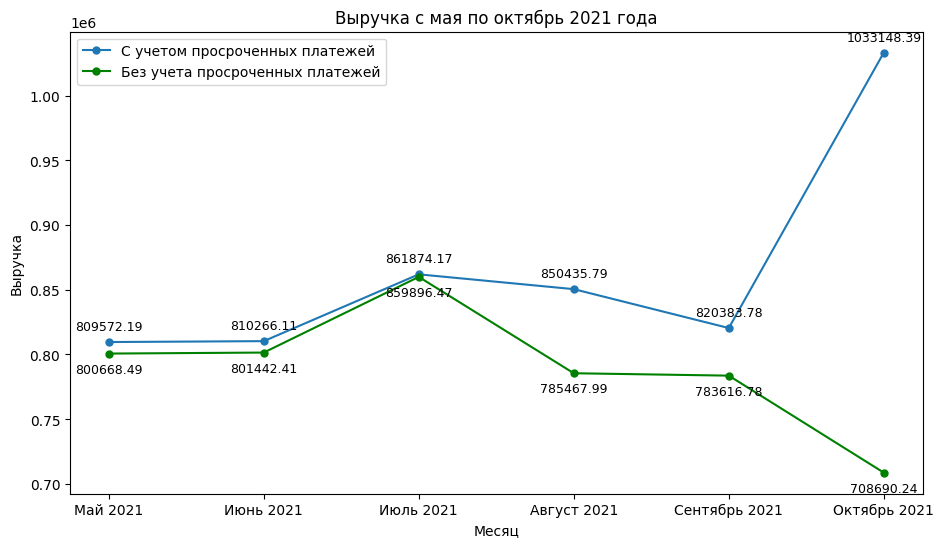

При рассмотрении выручки без учета просроченных платежей можно отметить, что самый прибыльный месяц - Июль,
после выручка пошла на спад. Также по графику видно, что в октябре самый высокий процент просроченных платежей.


In [66]:
import matplotlib.pyplot as plt

months=['Май 2021','Июнь 2021','Июль 2021','Август 2021','Сентябрь 2021','Октябрь 2021']

#определение выручки с учетом просроченных платежей и без
revenue_with_overdue=[]
revenue=[]

for i in range(len(months)):
    month1 = months[i]
    if i < len(months) - 1:
        month2 = months[i + 1]  # Следующий месяц
    else:
        month2='Ноябрь 2021'
    total = calculate_monthly_sum(month1, month2)
    revenue_with_overdue.append(total)
    general_without_overdue = calculate_monthly_sum(month1, month2, True)
    revenue.append(general_without_overdue)

plt.figure(figsize=(11,6))
plt.plot(months, revenue_with_overdue, label='С учетом просроченных платежей', marker='o', markersize=5)
plt.plot(months, revenue, label='Без учета просроченных платежей', marker='o', color='green', markersize=5)

for i, value in enumerate(revenue):
    plt.text(months[i], value-7000, str(value), ha='center', va='top', fontsize=9)

for i, value in enumerate(revenue_with_overdue):
    plt.text(months[i], value + 7000, str(value), ha='center', va='bottom', fontsize=9)

plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.title('Выручка с мая по октябрь 2021 года')
plt.legend(fontsize=10)
plt.show()

print(
    'При рассмотрении выручки без учета просроченных платежей можно отметить, что самый прибыльный месяц - Июль,\n'
    'после выручка пошла на спад. Также по графику видно, что в октябре самый высокий процент просроченных платежей.'
)

### 3) Нахождение менеджера, который привлек для компании больше всего денежных средств в сентябре 2021

In [64]:
from collections import Counter

data_for_Sept=get_data_segment('Сентябрь 2021','Октябрь 2021')
sale=data_for_Sept['sale']
revenue_Sept = data_for_Sept['sum'] 

# создание DataFrame для удобной обработки
df = pd.DataFrame({'sale': sale, 'sum': revenue_Sept})

# общая выручка каждого менеджера
revenue_per_sale = df.groupby('sale')['sum'].sum().reset_index()
revenue_per_sale.columns = ['sale', 'total_revenue']

#нахождение менеджера, привлекшего максимальную выручку
max_revenue=revenue_per_sale['total_revenue'].max()

print('Максмальную выручку привлек:')
print(revenue_per_sale[revenue_per_sale['total_revenue'] == max_revenue])

Максмальную выручку привлек:
      sale  total_revenue
6  Смирнов       221525.7


### 4) Нахождение количества новых и текущих сделок в октябре 2021
#### Внимание, в расчете учитывались сделки без просроченного платежа. В случае необходимости расчета с просроченными платежами, необходимо в вызове функции 'get_data_segment()' убрать третий аргумент со значением 'True'
С учетом просроченных платежей получаются значения: 'текущая': 99, 'новая': 36

In [65]:
data_for_Okt=get_data_segment('Октябрь 2021','Ноябрь 2021', True)
Counter(data_for_Okt['new/current'])

Counter({'текущая': 76, 'новая': 22})

### 5) Нахождение количества оригиналов договора по майским сделкам, полученных в июне 2021

In [61]:
data_for_May=get_data_segment('Май 2021','Июнь 2021')
data_for_May = data_for_May.copy()

# преобразование в datetime
data_for_May['receiving_date'] = pd.to_datetime(data_for_May['receiving_date'], errors='coerce')

# подсчет оригиналов, полученных в июне
originals_count = data_for_May[
    (data_for_May['document'] == 'оригинал') & 
    (data_for_May['receiving_date'].dt.month == 6)
].shape[0] 

print('В июне получено оригиналов за май:', originals_count)

В июне получено оригиналов за май: 76


### Вычисление остатка каждого из менеджеров на 01.07.2021.
#### В расчете будем учитывать оригиналы, пришедшие после 30.06.21, так как 01.07 оригиналы могут прийти вечером и в расчет не попадут. Оригиналы полученные ранее 01.07 выплачены не позднее июня.

In [67]:
#объединение данных за май и июнь
data_May_June=pd.concat([get_data_segment(months[0],months[1]),
                         get_data_segment(months[1], months[2])],
                         ignore_index=True)

data_May_June['receiving_date'] = pd.to_datetime(data_May_June['receiving_date'], errors='coerce')

#исключаем операции, оригинал за которые пришел в мае и июне, их уже выплатили
data_May_June = data_May_June[
    ~(data_May_June['receiving_date'].dt.month.isin([5, 6]))
]

new_deals_MJ=pd.DataFrame({'sum':data_May_June['sum'],
                           'status':data_May_June['status'],
                           'sale': data_May_June['sale'],
                           'new/current': data_May_June['new/current']})

#оставляем только новые сделки со статусом ОПЛАЧЕНО
new_deals_MJ=new_deals_MJ[(new_deals_MJ['new/current']=='новая')&
                          (new_deals_MJ['status']=='ОПЛАЧЕНО')]

#умножаем значение sum на 0.07
new_deals_MJ['sum'] *= 0.07

#группируем по sale и суммируем значения sum
summary_new = new_deals_MJ.groupby('sale')['sum'].sum().reset_index()

current_deals_MJ=pd.DataFrame({'sum':data_May_June['sum'],
                           'status':data_May_June['status'],
                           'sale': data_May_June['sale'],
                           'new/current': data_May_June['new/current']})

current_deals_MJ=current_deals_MJ[(current_deals_MJ['new/current']=='текущая')&
                                  (current_deals_MJ['status']!='ПРОСРОЧЕНО')]

current_deals_MJ['sum'] = np.where(current_deals_MJ['sum'] >= 10000,
                                    current_deals_MJ['sum'] * 0.05,
                                    current_deals_MJ['sum'] * 0.03)

summary_deals = current_deals_MJ.groupby('sale')['sum'].sum().reset_index()

#объединяем остатки за новые и текущие сделки
combined_summary = pd.merge(summary_deals, summary_new, on='sale', how='outer', suffixes=('_deals', '_new'))
combined_summary['sum'] = round(combined_summary['sum_deals'].fillna(0) + combined_summary['sum_new'].fillna(0),2)
combined_summary = combined_summary[['sale', 'sum']]

print('Остаток менеджеров на 01.07.21:\n\n',combined_summary)

Остаток менеджеров на 01.07.21:

          sale       sum
0     Андреев   3954.79
1    Васильев   1037.05
2      Иванов   5991.45
3   Кузнецова   4496.95
4     Петрова  10871.66
5   Селиванов   5297.69
6     Смирнов   7401.82
7     Соколов    269.21
8  Филимонова   2317.96
